# Algoritmos de regresión

Son algoritmos de aprendizaje supervisado y donde lo que buscamos es entrenar un modelo capaz de predecir el valor de una variable continua. 
1. Regresión ordinaria por mínimos cuadrados 
2. **Regresión lineal** 
3. **Regresión logística** .


## Regresón Lineal

Es un método estadístico que se utiliza para modelar la relación entre dos variables a travésde una línea recta. Esta línea recta se utiliza para predecir el valor de una variable desconocida, en función del valor de una variable conocida.

Por ejemplo:

                  pid = b + m * mass

Existen 2 tipos de regresión lineal:

## Simple:

Implica solo dos variables, una dependiente y una independiente. La variable independiente se utiliza para predecir la variable dependiente, mediante una línea recta.

                y = β₀+β₁*x + ε

donde:

**y** es la variable independiente.

**β** son dos constantes desconocidas que representan el punto de intersección (β₀) y la pendiente (β₁).

**ε**  es la función de pérdida.

## Múltiple

Involucra mas variables independientes para predecir una variable dependiente. En este modelo, se ajusta una ecuación de regresión que explica la relación entre la variable dependiente y múltiples variables independientes.

            y = β₀ + β₁x₁ + β₂x₂ +…+ βₐxₐ + ε 
            Y = β X (producto matricial)

donde: 

**y** es la variable dependiente.

**x** es una variable independiente.

**β** son coeficientes.

**ε** es la función de pérdida.


# Evaluación de la regresión lineal

Las técnicas comúnes para evaluar la regresión lineal, incluyen el error cuadrático medio, el coeficiente de determinación (R²), el análisis de residuos, la prueba de significancia y la validación cruzada. Estas técnicas pueden ayudar a determinar si el modelo de regresión lineal se ajusta bien a los datos y si se adecuado para su uso.

**RMS**: El proceso de aprendizaje consiste en averiguar qué parámetros β minimizan el error cuadrático medio entre los resultados reales y los estimados.

**R²**:  Para la regresión lineal simple, R² es simplemente el cuadrado del coeficiente de correlación de Pearson $\rho$

### Coeficiente de correlación de Pearson

Medida del grado de dependencia lineal entre dos variables siempre y cuando ambas sean cuantitativas y continuas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables, ya que está normalizada a la desviación estandar.

\begin{align}
\rho=\frac{Cov_{xy}}{\sigma_x\sigma_y}
\end{align}

Su valor se encuentra entre [-1,1] con: 
1. corr = 1 -> todos los puntos de datos se encuentran en  una línea recta de pendiente positiva
2. corr = 0 -> no existe una correlación lineal entre las variables
3. corr = -1 -> todos los puntos de datos se encuentran en una línea recta de pendiente negativa


### Ejemplo de regresión lineal simple

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def f(x):  # función f(x) = 2*x + 10 + 20*ruido
    np.random.seed(42)
    y = 2*x + 10 + 20*np.random.randn(x.shape[0])
    return y
x0 = np.arange(0, 200, 5) 
f = f(x0) 


m = [1.91835218], b = 13.58792525736692
Error Cuadrático Medio (MSE) = 331.8522012927901
Raíz del Error Cuadrático Medio (RMSE) = 18.216810952875097
Coeficiente de Determinación R2 = 0.9736439121020338


Text(0, 0.5, 'f(x)')

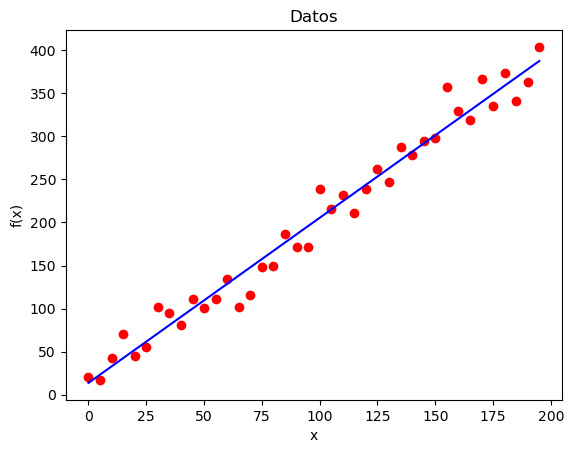

In [2]:


from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error

regresion_lineal = LinearRegression() # crear lel objeto de Regresión Linear
regresion_lineal.fit(x0.reshape(-1,1), f) #Entrenamos nuestro modelo
prediccion_entrenamiento = regresion_lineal.predict(x0.reshape(-1,1)) #predicciones 
# Error Cuadrado Medio
mse = mean_squared_error(y_true = f, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x0.reshape(-1,1), f)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) # parámetros que ha estimado la regresión lineal
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print('Coeficiente de Determinación R2 = ' + str(r2))
plt.scatter(x0, f, color="red")
plt.plot(x0, prediccion_entrenamiento, color="blue")
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('f(x)')

### PID

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

from sklearn.model_selection import train_test_split


#leer datos
data = pd.read_csv('pid.100.csv')

###############################################################
# #1 clase y en la segunda todas las demas
#dataset = data[3:]
#dataset.loc[data['pid'] != 101, "pid"] = 0 #Filtrado 
#dataset.loc[data['pid'] == 101, "pid"] = 1 #Filtrado piones
#############################################################

#####################################################
# #seleccionar datos (Solo dos calses)
dataset = data[(data["pid"] == 101) | (data["pid"] == 27)]
dataset.loc[dataset['pid'] == 27, "pid"] = 1 # lambda
dataset.loc[dataset['pid'] == 101, "pid"] = 0 # piones
###################################################

print(pd.Series(dataset['pid']).value_counts(sort = True))

#separar datos
y = dataset['pid'] # variable dependiente
x = dataset.drop(['pid'], axis=1) #  variable independiente

#seleccionar atributos
columnas = list(x.columns.values)
modelo = ExtraTreesClassifier() 
erec = RFE(modelo)  
erec = erec.fit(x, y)
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos


pid
0    28306
1      575
Name: count, dtype: int64


['e', 'p', 'pz', 'mass', 'ch']

In [4]:
#separar datos en entrenamiento y prueba

X = dataset[['z', 'e', 'pz', 'mass', 'ch']] 
Y = dataset['pid']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(20216, 5) (8665, 5) (20216,) (8665,)


In [5]:
#pair = dataset[['z','e','pz','mass','ch','pid']] 
#sns.pairplot(pair)

In [6]:
#Crear modelo de regresión lineal simple con el conjunto de entrenamiento
regresion_lineal = LinearRegression() # crear lel objeto de Regresión Linear

#Ajustar el modelo usando el modelo de la clase (debe tener mismo numero de filas tanto x como y)
regresion_lineal.fit(X_train, Y_train)

#Creando un vector de predicciones, se debe tomar solo los valores independientes
Y_pred = regresion_lineal.predict(X_test)

# Error Cuadrado Medio

print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))


Mean squared error: 0.00
Coefficient of determination: 1.00


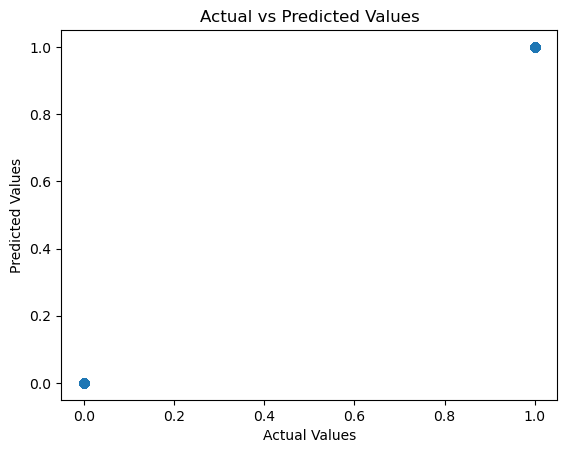

In [7]:
# Create scatter plot with actual and predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Regresión logística

La regresión lineal se utiliza para predecir una variable de salida numérica continua, ajustando una relación lineal entre las variables de entrada. El objetivo de la regresión lineal es encontrar la línea que mejor se ajuste
y que minimize el errore cuadrático medio entre los valores previstos y los reales.

La regresión logística se usa para predecir una variable de salida binaria, generalmente un 0 o un 1. Modela la probabilidad de que la variable de salida tome un valor determinado, dadas las variables de entrada. Lo hace ajustando una función logística (también conocida como función sigmoidea) a las variables de entrada. La función logística asigna cualquier valor de entrada a un valor entre 0 y 1, que se puede interpretar como la probabilidad de que la variable de salida sea 1.

La principal diferencia entre la regresión lineal y la regresión logística es el tipo de variable de salida que predicen. La regresión lineal predice una salida numérica continua, mientras que la regresión logística predice una variable de salida binaria modelando la probabilidad de que la variable de salida tome un valor determinado.

## Función sigmoide
 
\begin{align}
\large f(x)=\sigma(x)=\frac{1}{1+e^{(β₀ + β₁x₁ + β₂x₂ +…+ βₐxₐ + ε)}}
\end{align}



La regresión logística transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1.

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

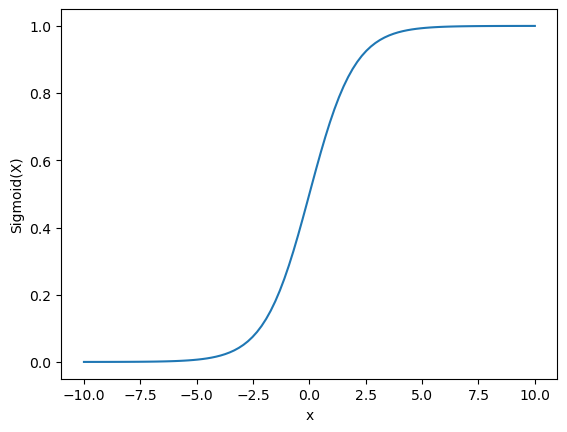

In [8]:
x = np.linspace(start=-10, stop= 10, num=100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

In [9]:

###############################################################
# #1 clase y en la segunda todas las demas
dataset2 = data[3:]
dataset2.loc[data['pid'] != 27, "pid"] = 0 #Filtrado 
dataset2.loc[data['pid'] == 27, "pid"] = 1 
#############################################################

print(pd.Series(dataset2['pid']).value_counts(sort = True))

#separar datos
Y2 = dataset2['pid'] # variable dependiente
X2 = dataset2.drop(['pid'], axis=1) #  variable independiente

X2 = sc.fit_transform(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 1)
print(X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape)



pid
0    73903
1      575
Name: count, dtype: int64
(52134, 11) (22344, 11) (52134,) (22344,)


In [10]:
from sklearn.linear_model import LogisticRegression 

#lr = LogisticRegression()
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
lr.fit(X2_train,Y2_train)
Y2_pred = lr.predict(X2_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)

beta_0: [-17.78825975]
beta_1: [[-4.61650113e-02  2.53299687e-02  2.22690027e-03 -3.84545847e+00
   6.47953457e-01 -2.32494078e+00  2.22016852e-01 -3.04174690e-02
   1.07708780e-02  1.56935734e+01 -1.25449607e+00]]


### Evaluación de la regesión logística

# Matriz de confusión

<center><div> <img src="figure/matrix.png" alt="Drawing" style="width: 600px;"/></div><center>

https://rapidminer.com/glossary/confusion-matrix/

* La clase final se determinará utilizando esta probabilidad y un umbral de decisión, este umbral puede ser ajustado para modificar el comportamiento de nuestro modelo para un problema específico.

* Los dos tipos errores de predicción son:

1. **Falso Positivo**: Predecir un evento cuando no hubo evento
2. **Falso Negativo**: Predecir que no hubo un evento cuando sí que hubo evento

El balanceo entre estos dos errores es lo que nos otorgará el nivel de umbral óptimo.

# Curva ROC Receiver Operating Characteristic (Característica Operativa del Receptor).

Para interpretar correctamente las predicciones realizadas por modelos de clasificación binarios utilizaremos las curvas ROC y las curvas de precisión-sensibilidad (Precision-Recall).

La **curva ROC** es una gráfica de la razón de falsos positivos (eje x) y de la razón de verdaderos positivos (eje y) dado un umbral, es decir, nos da la "falsa alarma" vs la tasa de éxito.

La tasa de verdaderos positivos se calcula como el número de positivos verdaderos divididos entre el número de positivos verdaderos y de falsos negativos, es decir, la **sensibilidad** de nuestro modelo para prediciendo las clases positivas cuando la salida real es positiva. 

La tasa de falsos positivos se calcula como el número de falsos positivos dividido entre la suma de falsos positivos con los verdaderos negativos. Se considera como la tasa de "falsa alarma", es decir, que una clase negativa sea determinada por el modelo como positiva.

La **especificidad** es la inversa de la tasa de falsos positivos. Se obtiene dividiendo el número total de verdaderos negativos entre la suma de los verdaderos negativos y los falsos positivos. 

La curva ROC permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador y el área debajo de la curva (AUC) es el resumen de la calidad del modelo.

* Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
* Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

1. El modelo morado representa a un clasificador perfecto. 
2. Las curvas más alejadas son los peores modelos. 
3. Un modelo aleatorio sin entrenar es una línea horizontal a media altura (0.5).

<center><div> <img src="figure/rocv2.png" alt="Drawing" style="width: 500px;"/></div><center>

https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/


# Curva de precisión-sensibilidad (Precision-Recall)

La **precisión** se calcula como el número de verdaderos positivos entre la suma de verdaderos positivos y de falsos positivos. Describe cómo de bueno es el modelo a la hora de predecir las salidas de la clase positiva. 

La curva de precisión-sensibilidad enfrenta la precisión (eje y) con la sensibilidad (eje x) para diferentes umbrales.

https://arxiv.org/pdf/1905.05441.pdf

La curva de precisión-sensibilidad es útil cuando tenemos clases desbalanceadas, donde suele ser bastante común que haya muchos registros negativos (clase 0) y muy pocos positivos (clase 1), ya que no tiene en cuenta los falsos negativos. La curva de precisión-sensibilidad solo se preocupa de la clase positiva, es decir, de la clase minoritaria.

<center><div> <img src="figure/PR.png" alt="Drawing" style="width: 400px;"/></div><center>

El rendimiento del modelo se puede evaluar con dos valores:

**ROC**-> Área bajo la curva (AUC)
**PR** -> Valor F (F-Score) Calcula la media armónica de la precisión y la sensibilidad. 

\begin{align}
F_1 = 2* \frac{P*R}{P+R}
\end{align}

In [11]:
def run_model(X2_train, X2_test, Y2_train, Y2_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    #clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf_base.fit(X2_train, Y2_train)
    return clf_base

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

def show_result(X2_test, Y2_test, Y2_pred):
    #Generamos un clasificador sin entrenar ,  0 a todo
    ns2_probs = [0 for _ in range(len(Y2_test))]
    # Predecimos las probabilidades entrenando con lr
    lr2_probs = model.predict_proba(X2_test)
    #Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
    lr2_probs = lr2_probs[:, 1]
    # Calculamos el AUC
    ns2_auc = roc_auc_score(Y2_test, ns2_probs)
    lr2_auc = roc_auc_score(Y2_test, lr2_probs)
    #print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
    # Calculamos las curvas ROC
    ns2_fpr, ns2_tpr, _ = roc_curve(Y2_test, ns2_probs)
    lr2_fpr, lr2_tpr, _ = roc_curve(Y2_test, lr2_probs)

    conf_matrix2 = metrics.confusion_matrix(Y2_test, Y2_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap = 'Blues_r')
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(Y2_test, Y2_pred))

    lr2_precision, lr2_recall, _ = precision_recall_curve(Y2_test, lr2_probs)
    lr2_f1, lr2_auc = f1_score(Y2_test, Y2_pred), auc(lr2_recall, lr2_precision)
    #print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
    print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr2_auc, lr2_f1))
    no_train2 = len(Y2_test[Y2_test==1]) / len(Y2_test)
    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='Sin entrenar')
    plt.plot(lr2_fpr, lr2_tpr, marker='.', label='Regresión Logística')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot([0, 1], [no_train2, no_train2], linestyle='--', label='Sin entrenar')
    plt.plot(lr2_recall, lr2_precision, marker='.', label='Regresión Logística')
    #Etiquetas de ejes
    plt.xlabel('Sensibilidad')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()



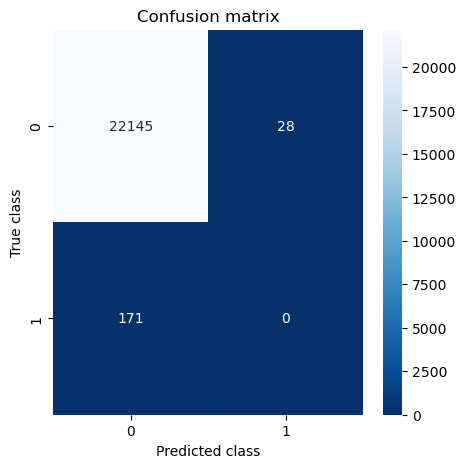

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22173
           1       0.00      0.00      0.00       171

    accuracy                           0.99     22344
   macro avg       0.50      0.50      0.50     22344
weighted avg       0.98      0.99      0.99     22344

Regresión Logística: auc=0.281 f1=0.000 


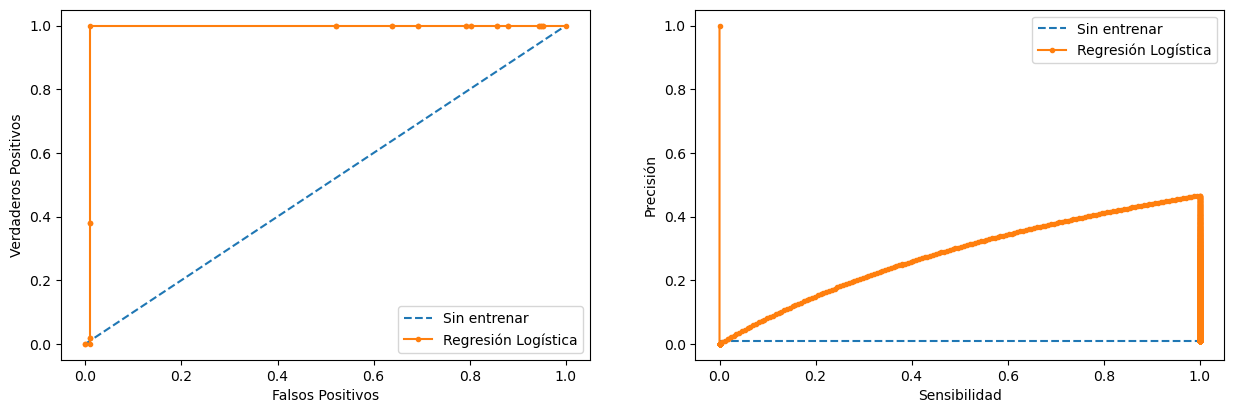

In [13]:
model = run_model(X2_train, X2_test, Y2_train, Y_test)
Y2_pred = model.predict(X2_test)
show_result(X2_test, Y2_test, Y2_pred)

## Clases desbalanceadas

Conjunto de datos de entrenamiento con clases minoritarias, por lo que la información esta sesagada

### Podemos resolver el problema de diferentes formas: 

**Ajuste de Parámetros del modelo:** Ajustar la métrica del modelo para equilibrar a la clase minoritaria, dando un peso diferente durante el entrenamiento.

**Modificar el Dataset:**  Eliminar datos de la clase mayoritaria para reducirla.

**Muestras artificiales:** Crear muestras sintéticas utilizando algoritmos que intentan seguir la tendencia del grupo minoritario. 

**Ensamble de métodos:** Entrenar diversos modelos y entre todos obtener el resultado final.


https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

### Biblioteca: imbalanced-learn

https://pypi.org/project/imbalanced-learn/

$ pip install imbalanced-learn

### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE es un método de sobremuestreo que crea una muestras sintéticas (no duplicadas) de la clase minoritaria. hasta que sea igual a la clase mayoritaria. SMOTE hace esto seleccionando registros similares y alterando ese registro una columna a la vez aleatoriamente.

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter  
os_us = SMOTE()
X2_train_res, Y2_train_res = os_us.fit_resample(X2_train, Y2_train)
 
print ("before resampling {}".format(Counter(Y2_train)))
print ("after resampling {}".format(Counter(Y2_train_res)))


before resampling Counter({0: 51730, 1: 404})
after resampling Counter({0: 51730, 1: 51730})


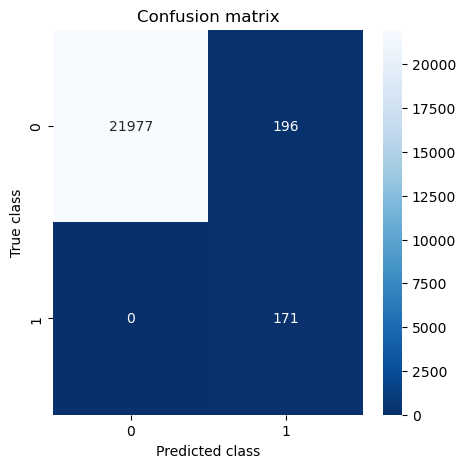

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22173
           1       0.47      1.00      0.64       171

    accuracy                           0.99     22344
   macro avg       0.73      1.00      0.82     22344
weighted avg       1.00      0.99      0.99     22344

Regresión Logística: auc=0.281 f1=0.636 


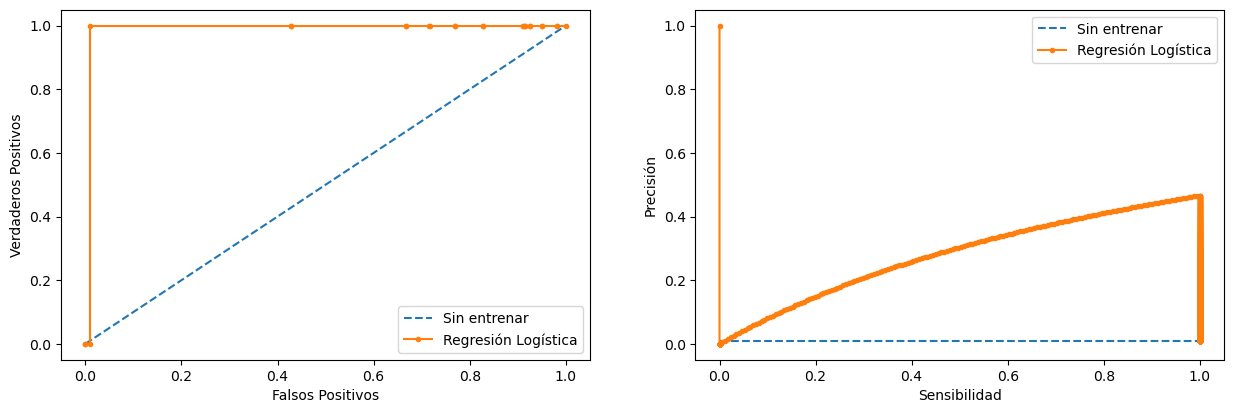

In [15]:
model = run_model(X2_train_res, X2_test, Y2_train_res, Y2_test)
Y2_pred = model.predict(X2_test)
show_result(X2_test, Y2_test, Y2_pred)